# 오토인코더와 GAn을 사용한 표현 학습과 생성적 학습
* 오토인코더는 레이블 없이 잠재표현 또는 코딩의 밀집표현을 학습 할 수 있다.
* 차원 축소 시각화에 유용하다
* 심층 신경망의 비지도 사전훈련에 사용될 수 있다.
* 새로운 데이터 생성 가능하다. 생성모델
* GAN을 사용해 생성한 얼굴은 가짜 구분이 어렵다.
* GAN은 해상도 높이기, 이미지 컬러화, 이미지 편집, 실제 이미지로 바꾸기, 다음 프레임 예측하기, 데이터 증식, 데이터 생성, 취약점 식별 후 개선 등
* 오토인코더는 입력을 출력으로 복사하는 법을 배운다. 다양한 방법으로 네트워크에 제약을 가해 어렵개해서 효율적 표현을 배운다.
* GAN은 생성자가 훈련 데이터와 비슷하게 보이는 데이터를 생성하고 판별자가 이를 구별하는 방식으로 적대적 훈련을 진행한다.
---
### 효율적인 데이터 표현
* 시퀀스의 패턴을 찾는것이 유용하다. 패턴을 찾으면 효율적으로 정보를 저장할 수 있다.
* 오토 인코더가 입력을 받아 효율적인 내부 표현으로 바꾸고 입력과 가장 가까운 어떤 것을 출력한다.
* 오토인코더는 항상 두부분으로 구성된다. 
  *입력을 내부표현으로 바꾸는 인코더(인지 네트워크), 출력으로 바꾸는 디코더(생성 네트워크) 이다.
* 오토인코더는 일반적으로 다층 퍼셋ㅂ트론과 구성이 비슷하다.
* 입력을 재구성하기에 출력을 종종 재구성이라고 부른다. 비용함수는 재구성 손실이다.
---
### 과소완전 선형과 오토인코더로 PCA 수행하기
* 오토인코더가 선형 활성화 함수만 사용하고 비용 함수가 평균 제곱 오차(MSE)라면 결국 PCA를 수행하는 것으로 볼 수 있다.
* 오토인코더를 인코더와 디코더 두 개 컴포넌트로 구성한다. 둘 다 하나의 Dense층을 가진 일반적인 Sequential모델이다.
* 케라스 모델은 다른 모델의 층으로 사용될 수 있다.
* 출력 개수가 입력 개수와 동일하다.
*

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
encoder=keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])
decoder=keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])
autoencoder=keras.models.Sequential([encoder,decoder])
autoencoder.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [3]:
def plot_image(image,cmap="binary"):
  plt.imshow(image,cmap=cmap)
  plt.axis("off")

In [4]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [5]:
history=autoencoder.fit(X_train,X_train,epochs=20,batch_size=1)
codings=encoder.predict(X_train)

Epoch 1/20
60/60 [==============================] - 3s 1ms/step - loss: 0.0628
Epoch 2/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 3/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 4/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 5/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 6/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 7/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 8/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 9/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 10/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 11/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 12/20
60/60 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 13/20
60/60 [==============================

In [6]:
codings=encoder.predict(X_train)

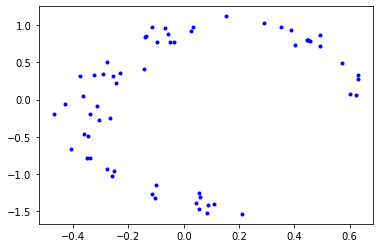

In [7]:
plt.plot(codings[:,0],codings[:,1],"b.")
plt.show()

### 적층 오토인코더
* 오토인코더도 은닉층을 여러개 가질 수 있다.
* 층을 더 추가하면 오토 인코더가 더 복잡한 코딩을 학습 가능.
* 오토인코더가 너무 강력해지면 훈련 데이터를 완벽하게 재구성하겠지만 유용한 데이터 표현을 학습하지 못할 것이다.
* 전형적으로 가운데 은닉층을 기준으로 대칭이다.
---
### 케라스를 이용해 적층 오토인코더 구현하기
* MLP와 비슷하게 구현 가능

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
## 새로운 측정
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

* 크기가 점점 줄어드는 인코더에 30출력을 내보낸다.
* 이것을 입력으로 받아서 최초입력의 크기만큼 출력으로 내보내고 그것을 최초입력 형태로 바꾼다.

In [10]:
stacked_encoder=keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[28,28]),
                                         keras.layers.Dense(100,activation="selu"),
                                         keras.layers.Dense(30,activation="selu")
])
stacked_decoder=keras.models.Sequential([
                                         keras.layers.Dense(100,activation="selu",input_shape=[30]),
                                         keras.layers.Dense(28*28,activation="sigmoid"),
                                         keras.layers.Reshape([28,28])
])
stacked_ae=keras.models.Sequential([stacked_encoder,stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1.5))
stacked_ae.fit(X_train,X_train,epochs=10,validation_data=(X_valid,X_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3369 - val_loss: 0.3150
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3059 - val_loss: 0.3029
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2993 - val_loss: 0.3002
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2953 - val_loss: 0.2976
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2928 - val_loss: 0.2928
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2911 - val_loss: 0.2909
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2896 - val_loss: 0.2900
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - val_loss: 0.2891
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2876 - val_loss: 0.2914
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.286

In [11]:
pred=stacked_ae.predict(X_test)

In [12]:
def plot_image(image):
  plt.imshow(image,cmap="binary")
  plt.axis("off")

* 이미지를 식별할 수는 있지만 정보를 많이 잃었다.
* 네트워크가 너무 강력하면 데이터에서 어떤 유익한 패턴을 학습하지 못하고 완벽한 재구성 이미지를 만들 것이다.

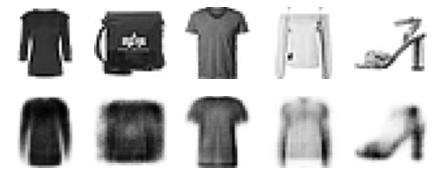

In [13]:
def show_reconstructions(model,n_images=5):
  reconstructions=model.predict(X_valid[:n_images])
  fig=plt.figure(figsize=(n_images*1.5,3))
  for image_index in range(n_images):
    plt.subplot(2,n_images,1+image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2,n_images,1+n_images+image_index)
    plot_image(reconstructions[image_index])
show_reconstructions(stacked_ae,n_images=5)

### 패션 MNIST 데이터셋 시각화
* 적층 오토인코더를 훈련했으므로 이 모델을 사용해 데이터셋의 차원 축소할 수 있다.
* 시각화 입장에서 보면 다른 차원 축소 알고리즘 만큼 좋은 결과를 주지 못한다.
* 하지만 샘플과 특성이 많은 대용량 데이터셋을 다룰 수 있다는 점에서 장점이 있다.
* 따라서 오토인코더로 적절한 수준으로 차원 축소 후. 다른 차원 축소 알고리즘을 사용하는 것도 전력이다.
* 적층 오토인코더의 인코더 모델을 사용해 차원을 30으로 줄인다.
* 그 다음 t-sne알고리즘을 구현해서 시각화를 위해 차원을 2까지 줄인다.

In [14]:
from sklearn.manifold import TSNE

X_valid_compressed=stacked_encoder.predict(X_valid)
tsne=TSNE()
X_valid_2D=tsne.fit_transform(X_valid_compressed)

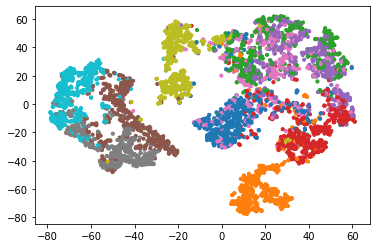

In [15]:
plt.scatter(X_valid_2D[:,0],X_valid_2D[:,1],c=y_valid,s=10,cmap="tab10")

### 적층 오토인코더를 사용한 비지도 사전훈련
* 복잡한 지도학습 문제라면 비슷하게 학습된 하위층을 재사용하는 것도 좋다.
* 기존 네트워크의 특성 감지기능을 재사용 하는것이다.
* 비슷하게 레이블되지 않은 대량의 데이터셋이 있으면 전체 데이터를 사용해 적층 오토인코더를 훈련한다.
* 그 다음 오토인코더의 하위층을 재사용해 실제 문제를 해결하기 위한 신경망을 만들고 레이블된 데이터를 사용해 훈련한다.
---
### 가중치 묶기
* 오토인코더가 완벽하게 대칭일 땐 디코더의 가중치와 인코더의 가중치를 묶는 것이 일반적이다.
* 케라스의 사용자 정의 츠을 만들어 층 간에 가중치를 묶어보자.
* transepose_b=True로 지정하면 두번째 매개변수를 전치하는 것과 동일하지만 matmul()연산에서 동적으로 전치를 수행하므로 훨씬효율적이다.


In [16]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

* 편향 벡터는 독자적으로 사용한다.

In [17]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3080 - val_rounded_accuracy: 0.9081
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2975 - rounded_accuracy: 0.9223 - val_loss: 0.2952 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3022 - val_rounded_accuracy: 0.9078
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2889 - rounded_accuracy: 0.9301 - val_loss: 0.2880 - val_rounded_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - rounded_accuracy: 0.9324 - val_loss: 0.2873 - val_rounded_accuracy: 0.9315
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2861 - val_rounded_accuracy: 0.9353
Epoch 7/10
1719/1719 [==================

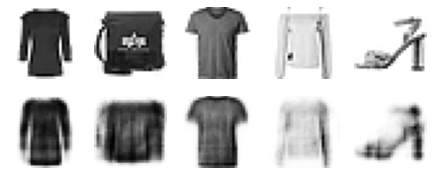

In [18]:
show_reconstructions(tied_ae)
plt.show()

### 한 번에

### 한 번에 오토인코더 한 개씩 훈련하기
* 한번에 전체 오토인코더를 훈련하는 것 보다 하나를 훈련하고 이를 쌓아 올려서 적층 오토 인코더를 만들 수 있다.
* 훈련 단계 1에서 첫번째 오토인코더는 입력을 재구성 하도록 학습된다.
* 그 다음 이 오터인코더를 사용해 전체 훈련세트를 인코딩하여 새 훈련세트를 만든다.
* 그 다음 이 오터인코더를 사용해 두번째 오토인코더를 훈련한다 단계2
* 마지막으로 모든 오토인코더를 사용해 전체 네트워크를 만든다.
* 딥러닝이 폭발적으로 커진 하나는 힌턴등의 탐욕적 층별 접근 방법을 사용해서 심층 신경망을 비지도 형태로 사전훈련 하는것.
* 이로 제한된 볼츠만 머신을 사용함.



In [19]:
def train_autoencoder(n_neurons,X_train,X_valid,loss,optimizer,n_epochs=5,output_activation=None,metrics=None):
  n_inputs=X_train.shape[-1]
  encoder=keras.models.Sequential([
                                   keras.layers.Dense(n_neurons,activation="selu",input_shape=[n_inputs])
  ])
  decoder=keras.models.Sequential([
                                   keras.layers.Dense(n_inputs,activation=output_activation),
  ])
  autoencoder=keras.models.Sequential([encoder,decoder])
  autoencoder.compile(optimizer,loss,metrics=metrics)
  autoencoder.fit(X_train,X_train,epochs=n_epochs,validation_data=(X_valid,X_valid))
  return encoder,decoder,encoder(X_train),encoder(X_valid)

In [20]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(lr=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(lr=0.05),
    output_activation="selu")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3445 - rounded_accuracy: 0.8874 - val_loss: 0.3123 - val_rounded_accuracy: 0.9146
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3039 - rounded_accuracy: 0.9203 - val_loss: 0.3006 - val_rounded_accuracy: 0.9246
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2949 - rounded_accuracy: 0.9286 - val_loss: 0.2934 - val_rounded_accuracy: 0.9317
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2891 - rounded_accuracy: 0.9342 - val_loss: 0.2888 - val_rounded_accuracy: 0.9363
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2853 - rounded_accuracy: 0.9378 - val_loss: 0.2857 - val_rounded_accuracy: 0.9392
Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4103 - val_loss: 0.2020
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1301 - val_loss: 0.1126
Epo

In [21]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

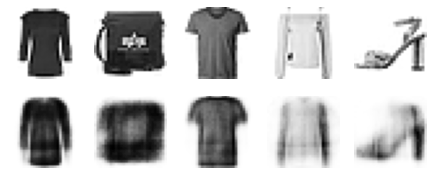

In [22]:

show_reconstructions(stacked_ae_1_by_1)
plt.show()

### 합성곱 오토인코더
* 이미지를 다루는 경우에는 합성곱 오토인코더가 좋다.
* 인코더는 합성곱과 풀링층의 일반적 CNN이고 전형적으로 입력에서 공간 방향의 차원을 줄이고 깊이를 늘인다.
* 디코더는 거꾸로 동작한다. 이를 위해서 전치 합성곱 층을 사용한다.

In [23]:
conv_encoder=keras.models.Sequential([
                                      keras.layers.Reshape([28,28,1],input_shape=[28,28]),
                                      keras.layers.Conv2D(16,kernel_size=3,padding="same",activation="selu"),
                                      keras.layers.MaxPool2D(pool_size=2),
                                      keras.layers.Conv2D(32,kernel_size=3,padding="same",activation="selu"),
                                      keras.layers.MaxPool2D(pool_size=2),
                                      keras.layers.Conv2D(64,kernel_size=3,padding="same",activation="selu"),
                                      keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder=keras.models.Sequential([
                                      keras.layers.Conv2DTranspose(32,kernel_size=3,strides=2,padding="valid",activation="selu",input_shape=[3,3,64]),
                                      keras.layers.Conv2DTranspose(16,kernel_size=3,strides=2,padding="same",activation="selu"),
                                      keras.layers.Conv2DTranspose(1,kernel_size=3,strides=2,padding="same",activation="sigmoid"),
                                      keras.layers.Reshape([28,28])
])

In [24]:
conv_ae=keras.models.Sequential([conv_encoder,conv_decoder])
conv_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1.0))
history=conv_ae.fit(X_train,X_train,epochs=2,validation_data=(X_valid,X_valid))

Epoch 1/2
1719/1719 [==============================] - 35s 4ms/step - loss: 0.3012 - val_loss: 0.2839
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2750 - val_loss: 0.2741


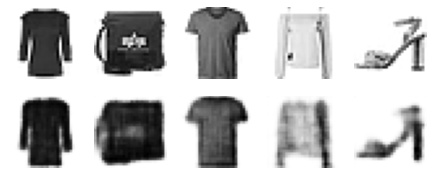

In [25]:
show_reconstructions(conv_ae)
plt.show()

### 순환 오토인코더
* 시계열이나 텍스트같은 시퀀스에 대한 오토인코더를 만들 수 있다.

In [26]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(15, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(10)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[10]),
    keras.layers.LSTM(15, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])
history = recurrent_ae.fit(X_train, X_train, epochs=3, validation_data=(X_valid, X_valid))

Epoch 1/3
1719/1719 [==============================] - 20s 9ms/step - loss: 0.5600 - rounded_accuracy: 0.6948 - val_loss: 0.5286 - val_rounded_accuracy: 0.7184
Epoch 2/3
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5079 - rounded_accuracy: 0.7657 - val_loss: 0.4927 - val_rounded_accuracy: 0.7885
Epoch 3/3
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4812 - rounded_accuracy: 0.7964 - val_loss: 0.4739 - val_rounded_accuracy: 0.8041


### 잡은 제거 오토인코더
* 오토인코더가 유용한 특성을 학습하도록 강제하는 방법은 잡음을 추가하고 잡음이 없는 원본 입력을 복원하도록 훈련시키는것
* 잡음은 가우시안 잡음이거나 드롭아웃처럼 무작위로 입력을 꺼서 발생시킬 수 있다.
* Dropout또는 가우시안노이즈 층을 인코더에 넣으면 된다.

In [27]:
dropout_encoder=keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[28,28]),
                                         keras.layers.Dropout(0.5),
                                         keras.layers.Dense(100,activation="selu"),
                                         keras.layers.Dense(30,activation="selu"),
])
dropout_decoder=keras.models.Sequential([keras.layers.Dense(100,activation="selu",input_shape=[30]),
                                         keras.layers.Dense(28*28,activation="selu"),
                                         keras.layers.Reshape([28,28])
                                         ])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=3,
                         validation_data=(X_valid, X_valid),batch_size=30)
dropout_ae=keras.models.Sequential([dropout_encoder,dropout_decoder])

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1834/1834 [==============================] - 6s 3ms/step - loss: 6.4995 - rounded_accuracy: 0.5736 - val_loss: 6.5114 - val_rounded_accuracy: 0.5730
Epoch 2/3
1834/1834 [==============================] - 5s 3ms/step - loss: 6.4971 - rounded_accuracy: 0.5738 - val_loss: 6.5007 - val_rounded_accuracy: 0.5734
Epoch 3/3
1834/1834 [==============================] - 6s 3ms/step - loss: 6.4898 - rounded_accuracy: 0.5740 - val_loss: 6.5003 - val_rounded_accuracy: 0.5733


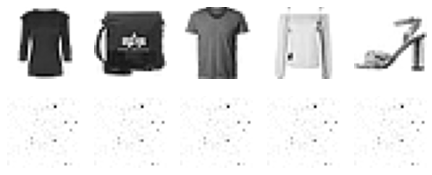

In [28]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae)

### 희소 오토인코더
* 좋은 특성의 다른 제약은 희소이다.
* 코딩층에서 활성화 되는 뉴런 수를 감소시킨다. 이는 적은 수의 활성화 뉴런을 조합하여 입력을 표현해야 한다.
* 결국 각 뉴런은 유용한 특성을 표현한다.
* 시그모이드 활성화함수를 사용하고 l1규제를 더한다.
* 신경망이 0에 가까운 코딩을 만들도록 유도하지만 입력을 올바르게 재구성하지 못하면 벌칙을 받기 때문에 적어도 0이 아닌 값이 조금은 출력되어야 한다.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/4
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4310 - rounded_accuracy: 0.8129 - val_loss: 0.3808 - val_rounded_accuracy: 0.8555
Epoch 2/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3690 - rounded_accuracy: 0.8689 - val_loss: 0.3638 - val_rounded_accuracy: 0.8741
Epoch 3/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3545 - rounded_accuracy: 0.8799 - val_loss: 0.3502 - val_rounded_accuracy: 0.8857
Epoch 4/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3437 - rounded_accuracy: 0.8876 - val_loss: 0.3418 - val_rounded_accuracy: 0.8898


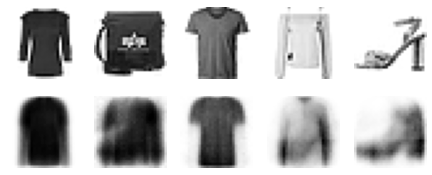

In [29]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=4,
                           validation_data=(X_valid, X_valid))
show_reconstructions(sparse_l1_ae)

In [30]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [31]:
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=3,
                           validation_data=(X_valid, X_valid))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4133 - rounded_accuracy: 0.8142 - val_loss: 0.3700 - val_rounded_accuracy: 0.8597
Epoch 2/3
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3527 - rounded_accuracy: 0.8768 - val_loss: 0.3432 - val_rounded_accuracy: 0.8861
Epoch 3/3
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3322 - rounded_accuracy: 0.8939 - val_loss: 0.3269 - val_rounded_accuracy: 0.8999


### 변이형 오토인코더
* 확률적 오토인코더 : 훈련이 끝난 이후에도 출력 부분이 우연에 의해 결정된다.
* 생성 오토인코더 : 훈련세트에서 샘플링 된 것 가은 새로운 샘플 생성.
* 입력에 대한 코딩을 만드는 대신 인코더는 평균 코딩과 표준편차를 만든다.
* 디코더가 샘플링 된 코딩을 보통처럼 디코딩한다.
* 인코더가 평균과 표준편차를 만들면 코딩이 랜덤하게 선택된다.
* 이 코딩이 디코드되어 훈련 샘플을 닮은 최종 출력을 만든다.
* 훈련하는동안 가우시안 샘플들의 군집처럼 보이도록 코딩공간 안으로 이동시킨다.
* 비용함수는 두가지가된다
  * 일반적인 재구성 손실
  * 가우시안 분포에서 샘플 된 것 같은 코딩을 가지도록 강제하는 잠재손실
  

In [32]:
class Sampling(keras.layers.Layer):
  def call(self,inputs):
    mean,log_var=inputs
    return K.random_normal(tf.shape(log_var))*K.exp(log_var/2)+mean
    # mean과 log_var을 받아서 평균이 0이고 표준편차가 1인 정규분포에서 랜덤한 벡터를 샘플링 한 후에 ex(r/2)를 곱하고 평균을 더한다.

In [33]:
codings_size=10
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=3, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/3
430/430 [==============================] - 4s 7ms/step - loss: 0.3874 - rounded_accuracy: 0.8633 - val_loss: 0.3602 - val_rounded_accuracy: 0.8827
Epoch 2/3
430/430 [==============================] - 3s 6ms/step - loss: 0.3426 - rounded_accuracy: 0.8979 - val_loss: 0.3397 - val_rounded_accuracy: 0.9045
Epoch 3/3
430/430 [==============================] - 3s 6ms/step - loss: 0.3326 - rounded_accuracy: 0.9052 - val_loss: 0.3334 - val_rounded_accuracy: 0.9031


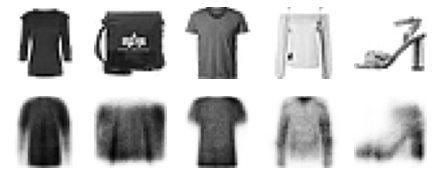

In [34]:
show_reconstructions(variational_ae)
plt.show()

In [35]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

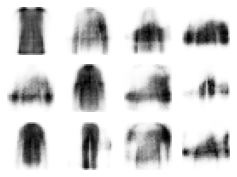

In [36]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

## 생성적 적대 신경망
* 신경망을 서로 겨루게 하고 경쟁을 통해 신경망을 향상하는 것을 기대한다.
---
#### 생성자
* 랜덤한 분포(일반적으로 가우시안 분포)를 입력으로 받고 이미지와 같은 데이터를 출력한다.
* 생성자는 변이형 오토인코더의 디코더와 같은 기능을 제공한다.
* 같은 방식으로 새로운 이미지를 생성한다.(가우시안 잡음으로 새로운이미지 생성), 훈련 방식이 다르다.
#### 판별자
* 생성자에서 얻은 가짜 이미지나 훈련 세트에서 추출한 진짜 이미지를 입력으로 받아 입력된 이미지가 가짜인지 진짜인지 구분한다.
* 판별자는 진짜 이미지와 가짜이미지를 구분하고 생성자는 판별자를 속일만큼 진짜 같은 이미지를 만든다.
---
* GAN은 다른 목적을 가진 두 네트워크로 구성되므로 일반적인 신경망처럼 훈련될 수 없다. 각 훈련 반복은 두단계로 이루어진다.
  * 첫번째 단계에서 판별자를 훈련한다. 훈련 세트에서 실제 이미지 배치를 샘플링하고 생성자에서 생성한 동일한 수의 가짜 이미지를 합친다.
    * 가짜 이비지의 레이블은 0으로 세팅하고 진짜 이미지는 1로 세팅한다.
    * 이진 크로스 엔트로피를 사용해 한 스텝동안 이렇게 레이블된 배치로 훈련한다.
    * 이 단계에서 역전파는 판별자의 가중치만 최적화 한다.
  * 두번째 단계에서 생성자를 훈련한다
    * 가짜 이미지 배치를 만든다.
    * 다시 파녑ㄹ자를 사용해 이미지가 진짜인지 가짜인지 판별한다.
    * 배치에 진짜 이미지를 추가하지 않고 레이블을 모두 1로 세팅한다. 판별자가 진짜라고 믿을 이미지를 만들어야 한다.
    * 이 단계 동안에는 판별자의 가중치를 동결하는 것이 중요. 역전파는 생성자의 가중치에만 영향을 미친다.
    

In [37]:
coding_size=30
generator=keras.models.Sequential([
                                     keras.layers.Dense(100,activation="selu",input_shape=[codings_size]),
                                     keras.layers.Dense(150,activation="selu"),
                                     keras.layers.Dense(28*28,activation="sigmoid"),
                                     keras.layers.Reshape([28,28]),
])
discriminator=keras.models.Sequential([
                                      keras.layers.Flatten(input_shape=[28,28]),
                                      keras.layers.Dense(150,activation="selu"),
                                      keras.layers.Dense(100,activation="selu"),
                                      keras.layers.Dense(1,activation="sigmoid")
])
gan=keras.models.Sequential([generator,discriminator])

In [38]:
discriminator.compile(loss="binary_crossentropy",optimizer="rmsprop")
discriminator.trainable=False
gan.compile(loss="binary_crossentropy",optimizer="rmsprop")

In [39]:
batch_size=32
dataset=tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [40]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()  

Epoch 1/5


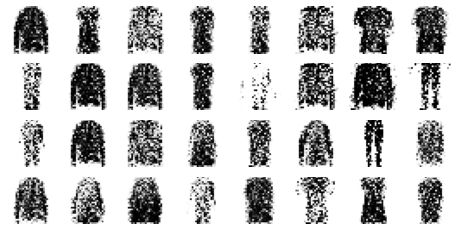

Epoch 2/5


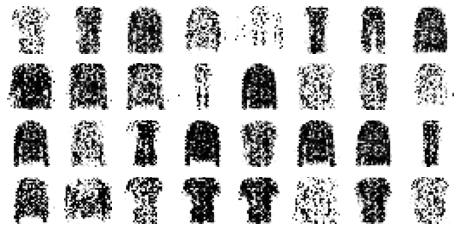

Epoch 3/5


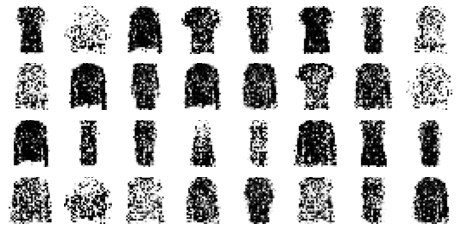

Epoch 4/5


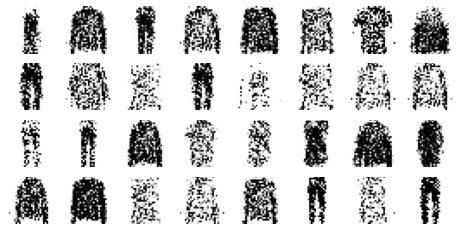

Epoch 5/5


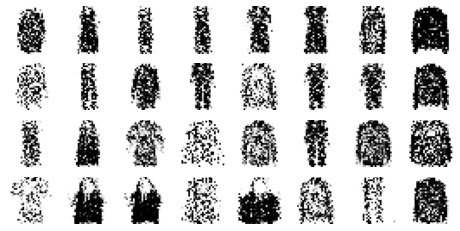

In [41]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=5)

### GAN훈련의 어려움
* 끝임없이 서로 앞서려하는 제로섬게임이 된다.
* 이는 내시균형의 상태에 다다를 수 있다. 이는 어떤 플레이어도 전략을 수정하지 않는 상태
* 생성자가 완벽하게 실제와 같은 이미지를 만들어내 판별자가 추측할 수 밖에 없을때
  * 매우 고무적이지만 어떤 것도 균형에 도달할 것이라고 보장하지 않는다.
* 가장큰 어려움은 모드붕괴이다. 이는 생성자의 출력의 다양성이 줄어들 때이다.
* 생성자가 신발을 더 그럴싸하게 만든다 하면 판별자가 신발 이미지를 많들도록 유도한다.
* 생성자는 점진적으로 다른 이미지 만드는 법을 잊게 된다.
* 따라서 판별자도 가짜를 구별하지 못하게 된다.
* 여러 요인이 복잡한 역학 관계에 영향을 주어 GAN의 하이퍼 파라미터는 매우 민감하다.
* 2014년까지 이런 문제에 매우 바빴다. 
  * 새로운 비용함수를 제안하거나 안정적으로 훈련하거나 모드 붕괴를 피하기 위한 기법이 많았다.
  * 경험재생이라 부르는 기법은 재생 버퍼에 저장하고 실제 이미지와 가짜 이미지를 판별해서 과대적합성을 줄인다.
  * 또다른 기법은 미니배치 판별입니다. 
---
### 심층 합성곱 GAN
* GAN으로 깊은 합성곱 층 기반하기 위한 노력이 시작됬다.
* 굉장히 불안정했으나 2015년 DCGAN 시작. 아래 주요 가이드라인
  * 판별자의 풀링층을 스트라이드 합성곱으로 바꾸고 생성자의 풀링층은 전치 합성곱으로 바꾼다.
  * 생성자와 판별자에 배치 정규화를 사용한다. 생성자의 출력층과 판별자의 입력은 제외
  * 층을 깊게 쌓기 위해 완전 연결 은닉층 제거
  * tanh함수를 사용해야하는 출력층 제외 모든 층은 ReLU사용
  * 판별자의 모든 층은 LeakyReLU를 사용

In [55]:
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [56]:
gan=keras.models.Sequential([generator,discriminator])

In [57]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [58]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [59]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/4


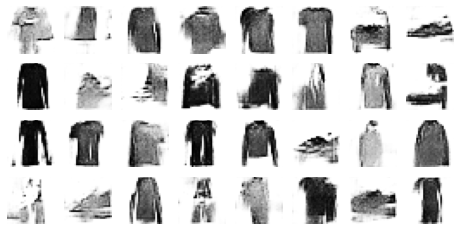

Epoch 2/4


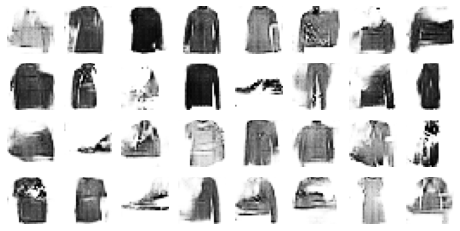

Epoch 3/4


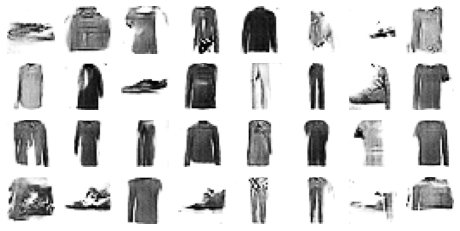

Epoch 4/4


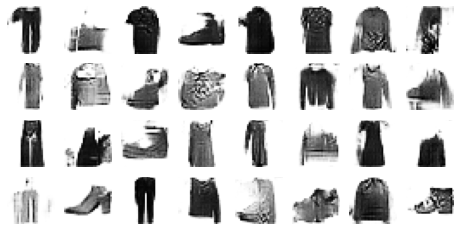

In [60]:
train_gan(gan, dataset, batch_size, codings_size,n_epochs=4)

* DCGAN은 완벽하지 않다. 매우 큰 이미지를 생성하면 국부적으로는 특징이 구분되지만 전반적으로는 일관성 없는 이미지를 얻을 가능성이 높다.
---
### ProGAN
* 2018년 한 논문 훈련 초기에 작은 이미지를 생성하고 점진적으로 생성자와 판별자에 합성곱 층을 추가해 갈수록 큰 이미지를 만드는 방법.
* 적층 오토인코더와 비슷하다. 
* 기존 합성곱 층에 업샘플링 층을 추가한다.
* 이전에 훈련된 층은 그대로 훈련 가능하도록 두고 생성자의 끝과 판별자의 시작부분에 층을 추가.
* 새로운 합성곱 층을 점진적으로 페이드 인 하고 원래 출력 층을 페이드 아웃 한다.
* 새로운 출력과 원래 출력의 가중치 하으로 최종 출력을 만든다.
---
#### 미니배치 표준편차 층
* 판별자의 마지막 층 근처에 추가한다.
* 입력에 있는 모든 위치에 대해 모든 채널과 배치의 모든 샘플에 걸쳐 표준편차를 계산한다.
* 이 표준편차는 모든 필셀에 대하여 평균하여 하나의 값을 얻는다.
* 추가적인 특성 맵이 배치의 모든 샘플에 추가되고 계산된 값으로 체워진다.
* 다양한 출력을 하게해서 모드 붕괴의 위험을 줄인다.
---
#### 동일한 학습속도
* 평균이 0이고 표준편차가 1인 가우시안 분포로 가중치 초기화.
* 가중치를 root(2/n)으로 나누어서 성능 향상
---
#### 픽셀별 정규화 층
* 생성자의 합성곱 층 뒤에 추가해서 이미즹 동일위치에 있는 모든 활성화를 채널에 대해 정규화한다.
---
#### Style GAN
* 2018엔비디아의 논문
* 생성자에 스타일 트렌스퍼 기법을 사용해 생성된 이미지가 훈련된 이미지와 같은 다양한 크기의 국부적인 구조를 갖도록 만든다.
* 판별자 손실함수는 그대로두고 생성자만 변경
* 네트워크 두개로 구성된다.
  #### 매핑 네트워크
  * 8개의 MLP가 잡재 표현 z(코딩)을 w(벡터)로 매핑한다.
  * 이 벡터는 아핀 변환(활성화 함수가 없는 Dense층)으로 전달되어 벡터를 여러개생성한다.
  * 이 벡터는 미세한 텍스처부터 고수준 특성까지 각기 다른 수준에서 생성된 이미지 스타일을 제어한다.
  #### 합성 네트워크
  * 이미지 생성을 책임진다.
  * 일정하게 학습된 입력을 받는다.
  * 입력을 합성곱 여러개와 업샙플링 층에 통과시킨다.
  * 입력과 모든 합성곱 층에 출력에 잡음이 조금 섞인다.
  * 적응적 인스턴스 정규화 층이 뒤따른다.
  * 각 특성 맵을 독립적으로 표준화 한 다음 스타일 벡터를 사용해 스케일과 이동을 결정한다.
* 